<a href="https://colab.research.google.com/github/M-M-Mujtaba/Kmeans_Compression/blob/master/AI_ASS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


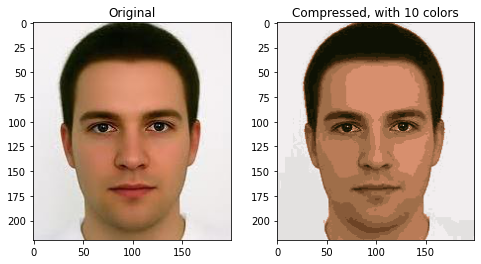

In [16]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
import matplotlib as mpl



# Optimization module in scipy
from scipy import optimize


import math

# library written for this exercise providing additional functions for assignment submission, and others






def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.

    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example.
        That is, we have m examples each of n dimensions.

    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.

    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.

    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================
    import pdb
    # pdb.set_trace()
    print(centroids.shape)
    for i in range(X.shape[0]):
        min = 100000
        for j in range(centroids.shape[0]):
            dist = math.sqrt((X[i][0] - centroids[j][0]) ** 2 + (X[i][1] - centroids[j][1]) ** 2)
            if dist < min:
                idx[i] = j
                min = dist

    # =============================================================
    return idx


def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.

    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions.

    idx : array_like
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.

    K : int
        Number of clusters

    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data
        points assigned to it.

    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    counter = np.zeros((K, 1))

    # ====================== YOUR CODE HERE ======================
    for i in range(m):
        centroids[idx[i]] += X[i]
        counter[idx[i]] += 1

    centroids = centroids / counter

    # =============================================================
    return centroids


def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.

    Parameters
    ----------
    X : array_like
        The dataset of size (m x n).

    K : int
        The number of clusters.

    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).

    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    m, n = X.shape

    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]

    # =============================================================
    return centroids


def runkMeans(X, centroids,
              max_iters=10, plot_progress=False):
    """
    Runs the K-means algorithm.

    Parameters
    ----------
    X : array_like
        The data set of size (m, n). Each row of X is a single example of n dimensions. The
        data set is a total of m examples.

    centroids : array_like
        Initial centroid location for each clusters. This is a matrix of size (K, n). K is the total
        number of clusters and n is the dimensions of each data point.

    findClosestCentroids : func
        A function (implemented by student) reference which computes the cluster assignment for
        each example.

    computeCentroids : func
        A function(implemented by student) reference which computes the centroid of each cluster.

    max_iters : int, optional
        Specifies the total number of interactions of K-Means to execute.

    plot_progress : bool, optional
        A flag that indicates if the function should also plot its progress as the learning happens.
        This is set to false by default.

    Returns
    -------
    centroids : array_like
        A (K x n) matrix of the computed (updated) centroids.
    idx : array_like
        A vector of size (m,) for cluster assignment for each example in the dataset. Each entry
        in idx is within the range [0 ... K-1].

    anim : FuncAnimation, optional
        A matplotlib animation object which can be used to embed a video within the jupyter
        notebook. This is only returned if `plot_progress` is `True`.
    """
    K = centroids.shape[0]
    idx = None

    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)

        # if plot_progress:
        #     idx_history.append(idx)
        #     centroid_history.append(centroids)

        centroids = computeCentroids(X, idx, K)

    # if plot_progress:
    #     fig = pyplot.figure()
    #     anim = FuncAnimation(fig, plotProgresskMeans,
    #                          frames=max_iters,
    #                          interval=500,
    #                          repeat_delay=2,
    #                          fargs=(X, centroid_history, idx_history))
    #     return centroids, idx, anim

    return centroids, idx



# ======= Experiment with these parameters ================
# You should try different values for those parameters
K = 10
max_iters = 10

# Load an image of a bird
# Change the file name and path to experiment with your own images
A = mpl.image.imread('/content/face.png')#os.path.join('Data', 'bird_small.png'))
print(type(A))
# ==========================================================
temp = np.array(A, copy = True)
print(type(temp))
# Divide by 255 so that all values are in the range 0 - 1
temp = temp / 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = temp.reshape(-1, 3)

# When using K-Means, it is important to randomly initialize centroids
# You should complete the code in kMeansInitCentroids above before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids,
                                 max_iters)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

# Display the original image, rescale back by 255
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(temp*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)